## Import Packages

In [41]:
import pandas as pd
import pandas_ta
import statsmodels.api as sm
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## DataSet

In [42]:
#Grab the data that we need
data = pd.read_csv('TSLA.csv')
                 
#list of entries

In [43]:
#Summary Statistics
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
1,2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000
2,2020-12-04,591.010010,599.039978,585.500000,599.039978,599.039978,29401300
3,2020-12-07,604.919983,648.789978,603.049988,641.760010,641.760010,56309700
4,2020-12-08,625.510010,651.280029,618.500000,649.880005,649.880005,64265000
...,...,...,...,...,...,...,...
247,2021-11-24,1080.390015,1132.770020,1062.000000,1116.000000,1116.000000,22560200
248,2021-11-26,1099.469971,1108.780029,1081.000000,1081.920044,1081.920044,11680900
249,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500
250,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000


In [44]:
#Keep only the 'Adj Close' Value

df = pd.DataFrame(data, columns = ['Date','Adj Close'])
df['Adj Close'] = data['Adj Close'].pct_change() * 100

df

,Date,Adj Close
0,2020-12-02,NaN
1,2020-12-03,4.317710
2,2020-12-04,0.953853
3,2020-12-07,7.131416
4,2020-12-08,1.265270
...,...,...
247,2021-11-24,0.628475
248,2021-11-26,-3.053759
249,2021-11-29,5.090020
250,2021-11-30,0.683385


## Plot Adj Close

In [45]:
date_index = [11, 50, 100, 150, 200, 250]
date_list = pd.to_datetime(df.loc[date_index]['Date']).dt.date.tolist()

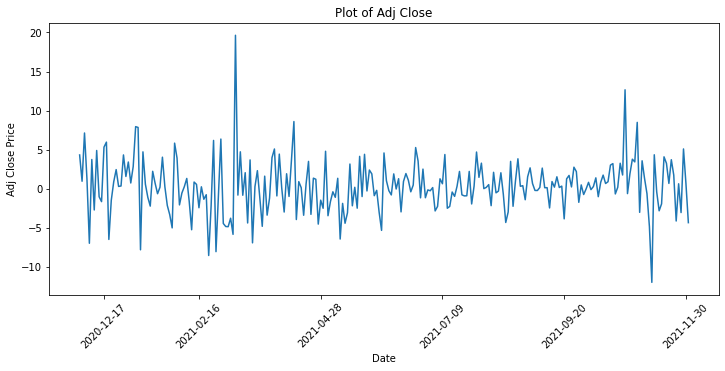

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Adj Close'])
plt.xticks(ticks=date_index, labels=date_list, rotation=45)
plt.title('Plot of Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

## Adding Technical Indicators

I will be adding the technical indicator EMA_10 which will be the exponential moving average calculated over a 5 day period.

In [49]:
df.ta.ema(close='adj_close',length = 10,append=True)
#Inspect the data once again

[X] Ooops!!! It's True, the series 'adj_close' was not found in Date, Adj Close, EMA_10


,Date,Adj Close,EMA_10
0,2020-12-02,NaN,NaN
1,2020-12-03,4.317710,NaN
2,2020-12-04,0.953853,NaN
3,2020-12-07,7.131416,NaN
4,2020-12-08,1.265270,NaN
...,...,...,...
247,2021-11-24,0.628475,0.305035
248,2021-11-26,-3.053759,-0.305655
249,2021-11-29,5.090020,0.675377
250,2021-11-30,0.683385,0.676833


In [50]:
for i in range(1,6):
    df['Lag '+ str(i)] = df['Adj Close'].shift(i)

In [51]:
df

,Date,Adj Close,EMA_10,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5
0,2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-03,4.317710,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-04,0.953853,NaN,4.317710,NaN,NaN,NaN,NaN
3,2020-12-07,7.131416,NaN,0.953853,4.317710,NaN,NaN,NaN
4,2020-12-08,1.265270,NaN,7.131416,0.953853,4.317710,NaN,NaN
...,...,...,...,...,...,...,...,...
247,2021-11-24,0.628475,0.305035,-4.135293,1.742207,3.710397,0.676761,3.250124
248,2021-11-26,-3.053759,-0.305655,0.628475,-4.135293,1.742207,3.710397,0.676761
249,2021-11-29,5.090020,0.675377,-3.053759,0.628475,-4.135293,1.742207,3.710397
250,2021-11-30,0.683385,0.676833,5.090020,-3.053759,0.628475,-4.135293,1.742207


In [52]:
df['Volume'] = data.Volume.shift(1).values/100_000_000

In [53]:
#Now lets get rid of the NaN values...
df= df.dropna()
df

,Date,Adj Close,EMA_10,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume
9,2020-12-15,-1.028401,1.284350,4.891888,-2.723782,3.737101,-6.985909,1.265270,0.520406
10,2020-12-16,-1.654951,0.749931,-1.028401,4.891888,-2.723782,3.737101,-6.985909,0.450715
11,2020-12-17,5.319781,1.580813,-1.654951,-1.028401,4.891888,-2.723782,3.737101,0.420958
12,2020-12-18,5.961271,2.377260,5.319781,-1.654951,-1.028401,4.891888,-2.723782,0.562701
13,2020-12-21,-6.494966,0.764128,5.961271,5.319781,-1.654951,-1.028401,4.891888,2.221262
...,...,...,...,...,...,...,...,...,...
247,2021-11-24,0.628475,0.305035,-4.135293,1.742207,3.710397,0.676761,3.250124,0.361717
248,2021-11-26,-3.053759,-0.305655,0.628475,-4.135293,1.742207,3.710397,0.676761,0.225602
249,2021-11-29,5.090020,0.675377,-3.053759,0.628475,-4.135293,1.742207,3.710397,0.116809
250,2021-11-30,0.683385,0.676833,5.090020,-3.053759,0.628475,-4.135293,1.742207,0.194645


### Plotting the EMA_10 Alongside the adj_close

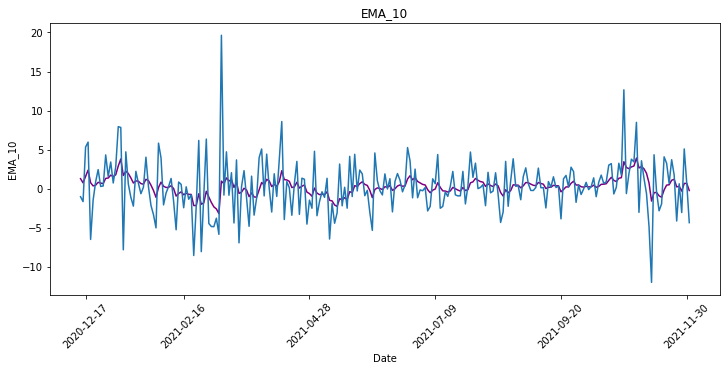

In [54]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['EMA_10'],color = "purple")
plt.plot(df.index, df['Adj Close'])
plt.xticks(ticks=date_index, labels=date_list, rotation=45)
plt.title('EMA_10')
plt.xlabel('Date')
plt.ylabel('EMA_10')
plt.show()

In [55]:
#Direction Column Needed to give us the binary values..

In [56]:
df['Direction'] = [1 if i > 0 else 0 for i in df['Adj Close']]

/var/folders/2_/35dw_19539s9q2116bvp5ml80000gn/T/ipykernel_26662/1858916558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] = [1 if i > 0 else 0 for i in df['Adj Close']]


In [57]:
df

,Date,Adj Close,EMA_10,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction
9,2020-12-15,-1.028401,1.284350,4.891888,-2.723782,3.737101,-6.985909,1.265270,0.520406,0
10,2020-12-16,-1.654951,0.749931,-1.028401,4.891888,-2.723782,3.737101,-6.985909,0.450715,0
11,2020-12-17,5.319781,1.580813,-1.654951,-1.028401,4.891888,-2.723782,3.737101,0.420958,1
12,2020-12-18,5.961271,2.377260,5.319781,-1.654951,-1.028401,4.891888,-2.723782,0.562701,1
13,2020-12-21,-6.494966,0.764128,5.961271,5.319781,-1.654951,-1.028401,4.891888,2.221262,0
...,...,...,...,...,...,...,...,...,...,...
247,2021-11-24,0.628475,0.305035,-4.135293,1.742207,3.710397,0.676761,3.250124,0.361717,1
248,2021-11-26,-3.053759,-0.305655,0.628475,-4.135293,1.742207,3.710397,0.676761,0.225602,0
249,2021-11-29,5.090020,0.675377,-3.053759,0.628475,-4.135293,1.742207,3.710397,0.116809,1
250,2021-11-30,0.683385,0.676833,5.090020,-3.053759,0.628475,-4.135293,1.742207,0.194645,1


In [58]:
df = df.assign(constant= 1.0)
df

,Date,Adj Close,EMA_10,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Direction,constant
9,2020-12-15,-1.028401,1.284350,4.891888,-2.723782,3.737101,-6.985909,1.265270,0.520406,0,1.0
10,2020-12-16,-1.654951,0.749931,-1.028401,4.891888,-2.723782,3.737101,-6.985909,0.450715,0,1.0
11,2020-12-17,5.319781,1.580813,-1.654951,-1.028401,4.891888,-2.723782,3.737101,0.420958,1,1.0
12,2020-12-18,5.961271,2.377260,5.319781,-1.654951,-1.028401,4.891888,-2.723782,0.562701,1,1.0
13,2020-12-21,-6.494966,0.764128,5.961271,5.319781,-1.654951,-1.028401,4.891888,2.221262,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
247,2021-11-24,0.628475,0.305035,-4.135293,1.742207,3.710397,0.676761,3.250124,0.361717,1,1.0
248,2021-11-26,-3.053759,-0.305655,0.628475,-4.135293,1.742207,3.710397,0.676761,0.225602,0,1.0
249,2021-11-29,5.090020,0.675377,-3.053759,0.628475,-4.135293,1.742207,3.710397,0.116809,1,1.0
250,2021-11-30,0.683385,0.676833,5.090020,-3.053759,0.628475,-4.135293,1.742207,0.194645,1,1.0


## Logistic Regression

The goal for this program is to be able to predict and determine the stock market direction. 


Logistic Regression is a classification technique for solving a binary classification problem. The outcome will only have two possible classes. Logistic regression, describes a relationship between one dependent variable and independent variables.

The prediction of the probability of an event is done through the logit function. 


### Variables: 
### Lag 1 - Lag 2

For each date the percentage returns for the two previous trading days.

### Volume

The number of shares traded on the previous day

### Direction

The determination of whether the market was Up or Down on a certain day

### Exponential Moving Average
The predictor variable I will be using for the logsitic regression.

We will be fitting a logistic regression model in order to predict Direction using Lag 1, Lag 2,Volume and the technical indicator EMA (Exponential Moving Average).



### Independent Variables

Here we are trying to use the lags and the volume to be able to predict the direction.
The independent variables are the lags, volume and EMA.

In [59]:
X = df[['constant','Lag 1','Lag 2','Lag 3','Lag 4','Lag 5','Volume','EMA_10']]

### Dependent Variables

The dependent variable is going to be what we are trying to predict which is the direction, whether or not the stock market is going up or down.

The direction will be described in binary terms, 

Direction = 1, if current closing price is greater than or equal to the previous price

Direction = 0, otherwise

In [60]:
y = df.Direction

## Training the Model

### Test_Train Split

This is where will be dividing two sets of data, the first will be the training data and the testing data. 

In this model 80% will be used for training and the remaining 20% will be used for testing.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

In [62]:
logreg = LogisticRegression()

In [63]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred=logreg.predict(X_test)

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [66]:
cnf_matrix

array([[15,  9],
       [ 3, 22]])

### Accuracy:
There is a classification rate of 75% which is good accuracy

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7551020408163265


### Precision:
How accurate the model is, this is a measure if the model makes a prediction how often does it make the correct one? So in this model, it is 70% accurate at a time.

In [68]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7096774193548387


## Printout relevant metrics


### Mean Absolute Error
Where this is the sum of the absolute error for all the observed values divided by the total number of observations. 

Note that the absolute error is the 
|predicted value - actual value|

It tells us how much error we can expect from the predicted value on average.


In [82]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.24489795918367346
